In [81]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [82]:
df = pd.read_csv('DATA/weatherAUS.csv')
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [84]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [85]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Preprocessing

In [86]:
perth = df[df['Location']=='Perth']
perth['Date'] = pd.to_datetime(perth['Date'])
perth.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
120638,2008-07-01,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,...,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
120639,2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
120640,2008-07-03,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,...,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
120641,2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
120642,2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes


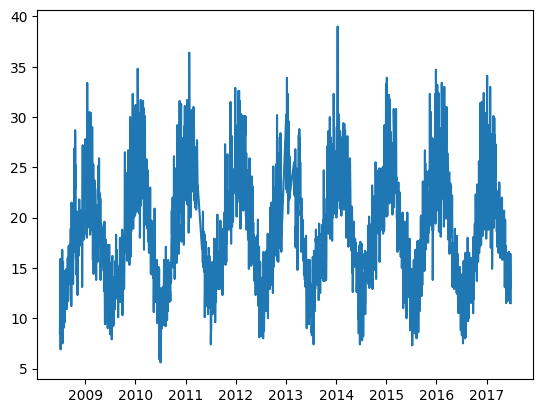

In [87]:
plt.plot(perth['Date'], perth['Temp9am'])
plt.show()

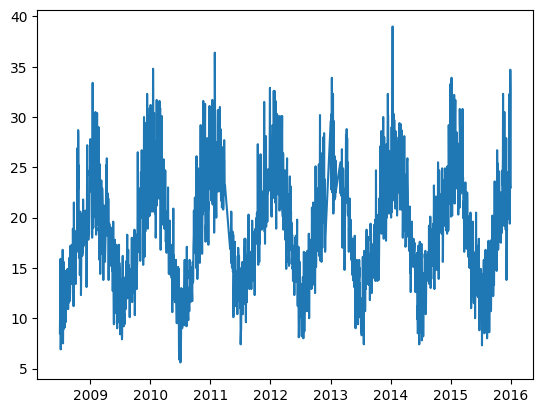

In [88]:
perth['Year'] = perth['Date'].apply(lambda x: x.year)
perth = perth[perth['Year']<=2015]
plt.plot(perth['Date'], perth['Temp9am'])
plt.show()

In [89]:
data = perth[['Date', 'Temp9am']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

,ds,y
120638,2008-07-01,8.5
120639,2008-07-02,11.1
120640,2008-07-03,12.1
120641,2008-07-04,13.2
120642,2008-07-05,15.9


In [90]:
data['ds'] = pd.to_datetime(data['ds'])
data = data.set_index(data['ds'])

# 2. Train Model

In [91]:
prophet = NeuralProphet()

In [92]:
model = prophet.fit(data, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.849% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (83) is too small than the required number for the learning rate finder (235). The results might not be optimal.


Finding best initial lr:   0%|          | 0/235 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# 3. Forecast Away

In [93]:
future = prophet.make_future_dataframe(data, periods=900)
forecast = prophet.predict(future)
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast = forecast.set_index(forecast['ds'])
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.849% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 83it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
ds,,,,,,
2016-01-01,2016-01-01,None,24.829893,19.161404,5.757161,-0.088671
2016-01-02,2016-01-02,None,24.929893,19.161465,5.818340,-0.049912
2016-01-03,2016-01-03,None,25.131315,19.161524,5.876564,0.093226
2016-01-04,2016-01-04,None,25.171610,19.161585,5.931782,0.078242
2016-01-05,2016-01-05,None,25.143312,19.161646,5.983958,-0.002292


In [94]:
plot1 = prophet.plot(forecast)
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '190323bc-20c6-4c89-8031-31bd5a290b02',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2018, 6, 16, 0, 0),
                          datetime.datetime(2018, 6, 17, 0, 0),
                          datetime.datetime(2018, 6, 18, 0, 0)], dtype=object),
              'y': array([24.82989311, 24.92989349, 25.13131523, ..., 13.04138184, 13.10043335,
                          13.0028677 ])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '809

In [95]:
plt2 = prophet.plot_components(forecast)
plt2

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '5b613421-7966-4923-8a12-dd5f26c06b6b',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2018, 6, 16, 0, 0),
                          datetime.datetime(2018, 6, 17, 0, 0),
                          datetime.datetime(2018, 6, 18, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([19.16140366, 19.16146469, 19.16152382, ..., 19.21552467, 19.21558571,
                          19.21564484]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',
  

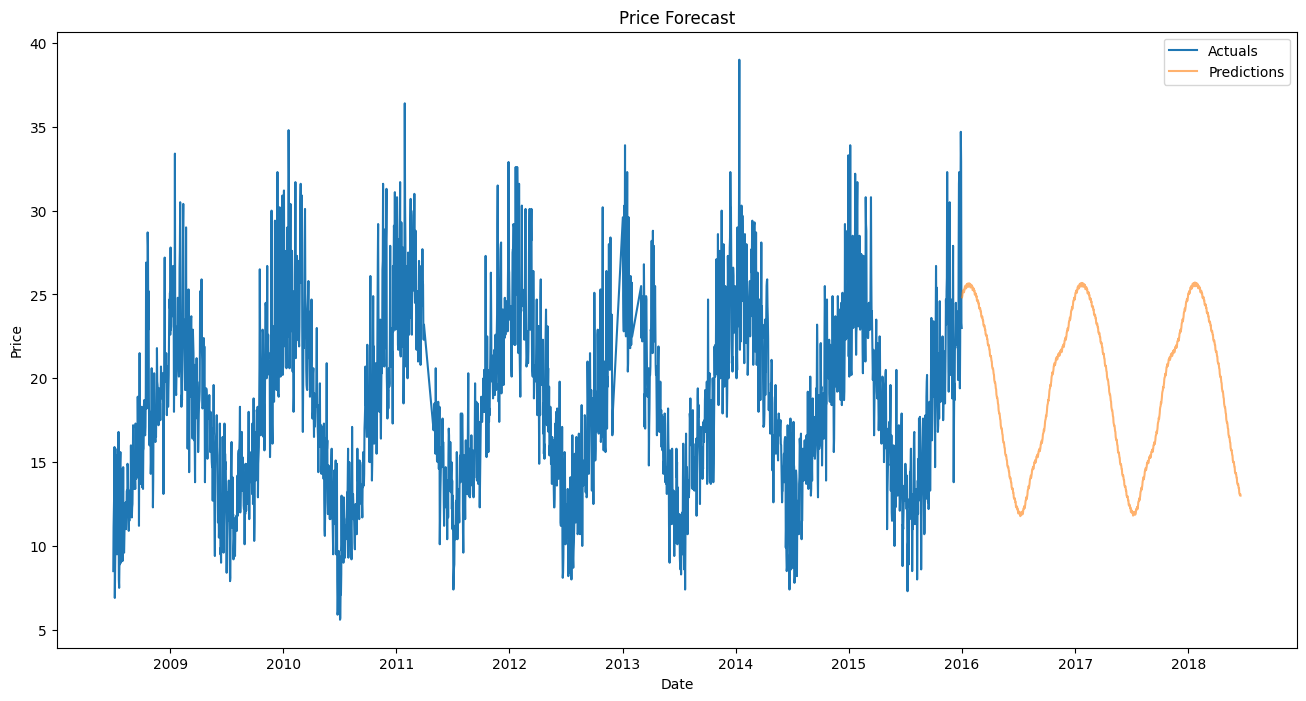

In [96]:
plt.figure(figsize=(16, 8))
plt.title('Price Forecast')

plt.plot(data.index, data['y'], label='Actuals')
plt.plot(forecast.index, forecast['yhat1'], label='Predictions', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
